In [1]:
import cellmap
import anndata
import scanpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "data/test_pancreas.h5ad"
adata = anndata.read_h5ad(filename)
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'silent gene', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'scale_factor', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'RECODE', 'RECODE_ss_log', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [3]:
np.min(adata.X.toarray()[adata.X.toarray()>0])

0.28846455

In [4]:
%%time

import importlib
importlib.reload(cellmap)

cellmap.Hodge_decomposition(adata)

{'Contribution_ratio': {'Potential': '79.43%', 'Rotation': '20.57%'}}
CPU times: user 1min 25s, sys: 18.8 s, total: 1min 43s
Wall time: 1min 8s


In [5]:
adata.obs

clusters_coarse       clusters   S_score  G2M_score  \
index                                                                  
AAACCTGAGAGGGATA   Pre-endocrine  Pre-endocrine -0.224902  -0.252071   
AAACCTGAGCCTTGAT          Ductal         Ductal -0.014707  -0.232610   
AAACCTGAGGCAATTA       Endocrine          Alpha -0.171255  -0.286834   
AAACCTGCATCATCCC          Ductal         Ductal  0.599244   0.191243   
AAACCTGGTAAGTGGC    Ngn3 high EP   Ngn3 high EP -0.179981  -0.126030   
...                          ...            ...       ...        ...   
TTTGTCAAGTGACATA   Pre-endocrine  Pre-endocrine -0.235896  -0.266101   
TTTGTCAAGTGTGGCA    Ngn3 high EP   Ngn3 high EP  0.279374  -0.204047   
TTTGTCAGTTGTTTGG          Ductal         Ductal -0.045692  -0.208907   
TTTGTCATCGAATGCT       Endocrine          Alpha -0.240576  -0.206865   
TTTGTCATCTGTTTGT       Endocrine        Epsilon -0.136407  -0.184763   

                  initial_size_spliced  initial_size_unspliced  initial_size  \
index                                                                          
AAACCTGAGAGGGATA                4954.0                  1575.0        4954.0   
AAACCTGAGCCTTGAT                7071.0                   978.0        7071.0   
AAACCTGAGGCAATTA                4070.0                  1095.0        4070.0   
AAACCTGCATCATCCC                8362.0                  1655.0        8362.0   
AAACCTGGTAAGTGGC                5026.0                  1014.0        5026.0   
...                                ...                     ...           ...   
TTTGTCAAGTGACATA                9219.0                  2488.0        9219.0   
TTTGTCAAGTGTGGCA                7298.0                   943.0        7298.0   
TTTGTCAGTTGTTTGG                5234.0                   789.0        5234.0   
TTTGTCATCGAATGCT               10260.0                  1851.0       10260.0   
TTTGTCATCTGTTTGT                5922.0                  1439.0        5922.0   

                     n_counts  velocity_self_transition  Hodge_potential  \
index                                                                      
AAACCTGAGAGGGATA  6194.000488                  0.085650         1.209183   
AAACCTGAGCCTTGAT  6193.999512                  0.222352         4.208273   
AAACCTGAGGCAATTA  6193.999512                  0.110320         1.159928   
AAACCTGCATCATCCC  6193.999512                  0.120770         4.566079   
AAACCTGGTAAGTGGC  6194.000000                  0.092465         2.075385   
...                       ...                       ...              ...   
TTTGTCAAGTGACATA  6193.999023                  0.087995         1.296557   
TTTGTCAAGTGTGGCA  6194.000000                  0.096125         3.043782   
TTTGTCAGTTGTTTGG  6193.999512                  0.131151         4.265202   
TTTGTCATCGAATGCT  6194.000000                  0.144727         0.961548   
TTTGTCATCTGTTTGT  6194.000977                  0.258464         1.163916   

                  Hodge_rotation  
index                             
AAACCTGAGAGGGATA    0.000000e+00  
AAACCTGAGCCTTGAT    0.000000e+00  
AAACCTGAGGCAATTA    0.000000e+00  
AAACCTGCATCATCCC    7.709882e-19  
AAACCTGGTAAGTGGC    0.000000e+00  
...                          ...  
TTTGTCAAGTGACATA    3.593019e-03  
TTTGTCAAGTGTGGCA   -2.891206e-19  
TTTGTCAGTTGTTTGG    2.891206e-19  
TTTGTCATCGAATGCT    0.000000e+00  
TTTGTCATCTGTTTGT    5.782412e-19  

[3696 rows x 11 columns]

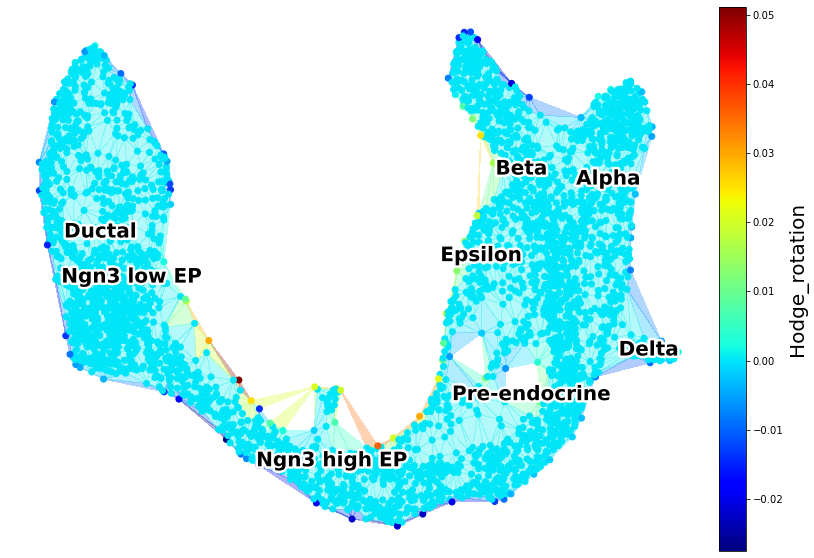

In [6]:
importlib.reload(cellmap)
cellmap.view(adata,potential_key='Hodge_rotation',show_graph = True, cluster_key='clusters', cmap='jet')

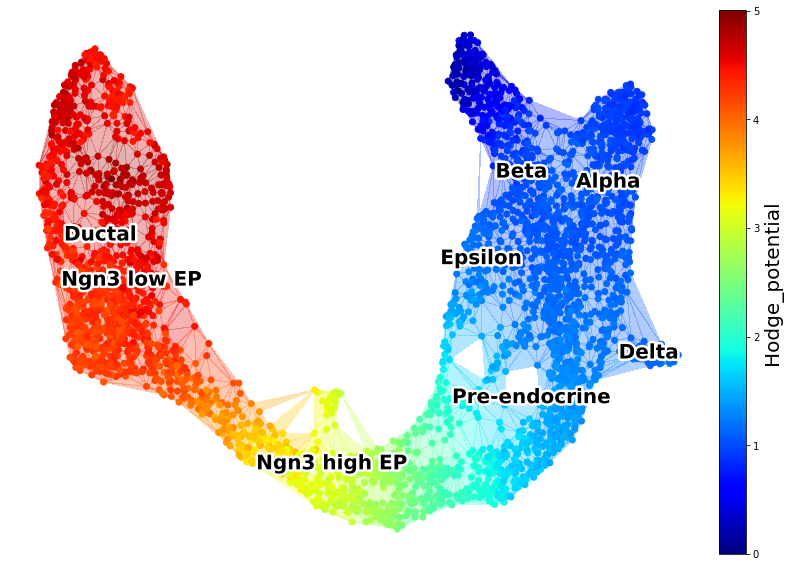

In [7]:
importlib.reload(cellmap)
cellmap.view(adata,show_graph = True,cluster_key = 'clusters',cmap='jet')

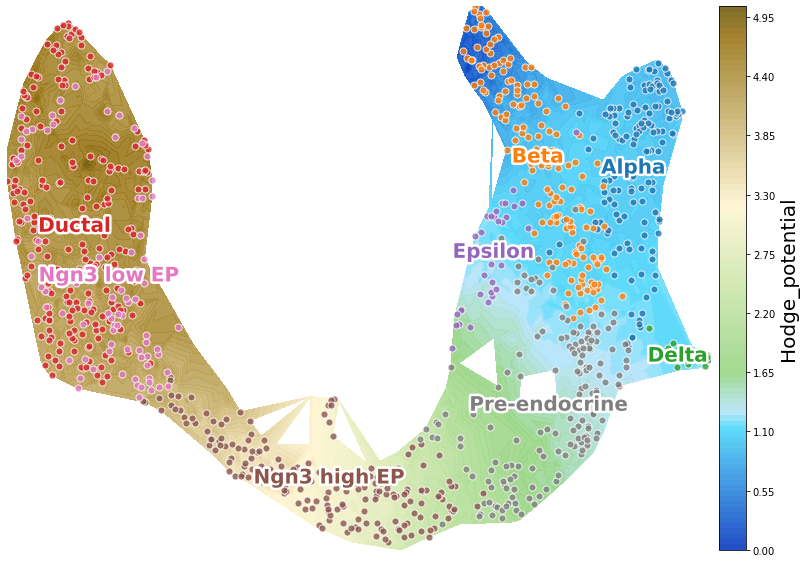

In [8]:
importlib.reload(cellmap)
cellmap.view_cluster(adata, show_graph=True, cluster_key='clusters',s=50)

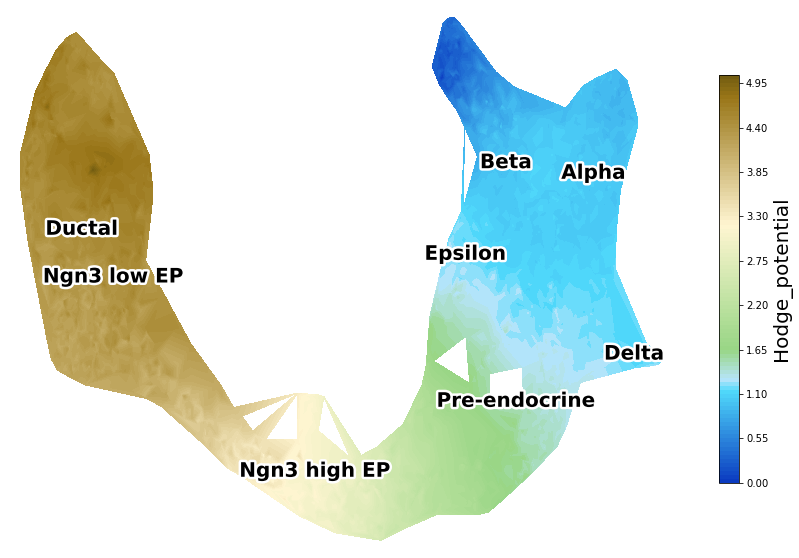

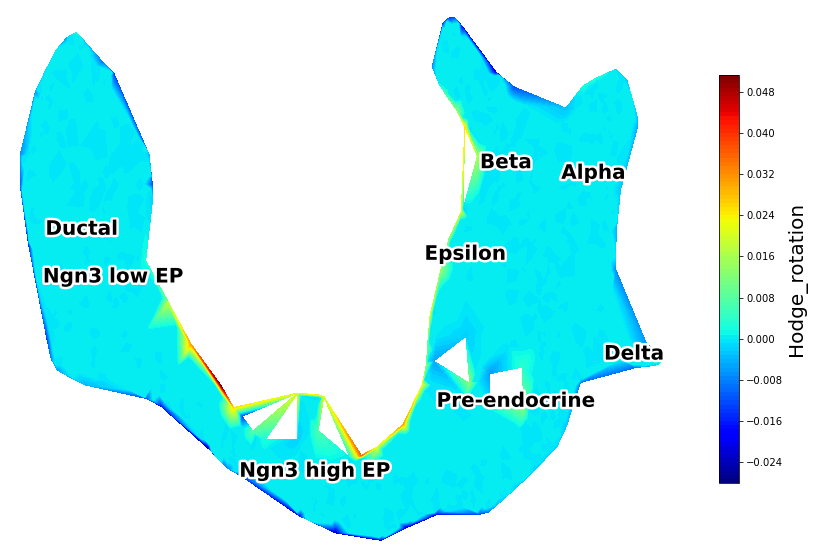

In [9]:
importlib.reload(cellmap)
cellmap.view_surface(adata,cluster_key ='clusters')
cellmap.view_surface(adata,potential_key='Hodge_rotation',cluster_key ='clusters',cmap='jet')

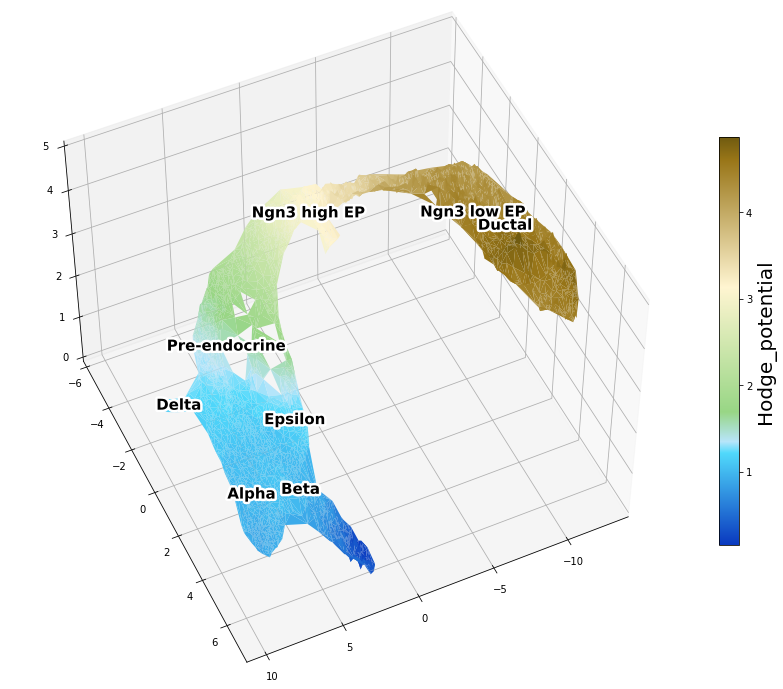

In [10]:
importlib.reload(cellmap)
cellmap.view_surface_3D(adata,cluster_key ='clusters',elev=50,azim=65)

500 3696 500


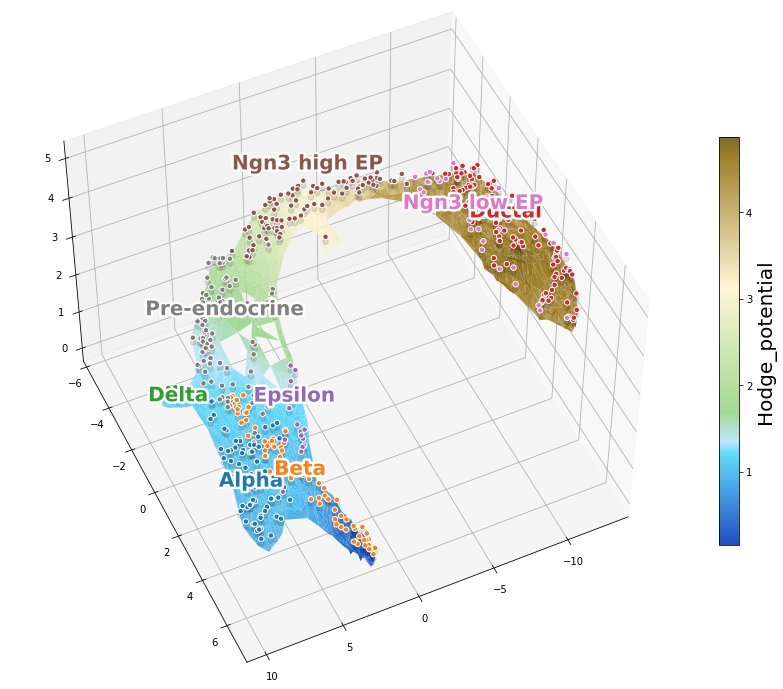

In [11]:
importlib.reload(cellmap)
cellmap.view_surface_3D_cluster(adata,cluster_key ='clusters',elev=50,azim=65,s=30);

{'Contribution_ratio': {'Potential': '53.25%', 'Rotation': '46.75%'}}
{'Contribution_ratio': {'Potential': '87.56%', 'Rotation': '12.44%'}}
{'Contribution_ratio': {'Potential': '88.79%', 'Rotation': '11.21%'}}


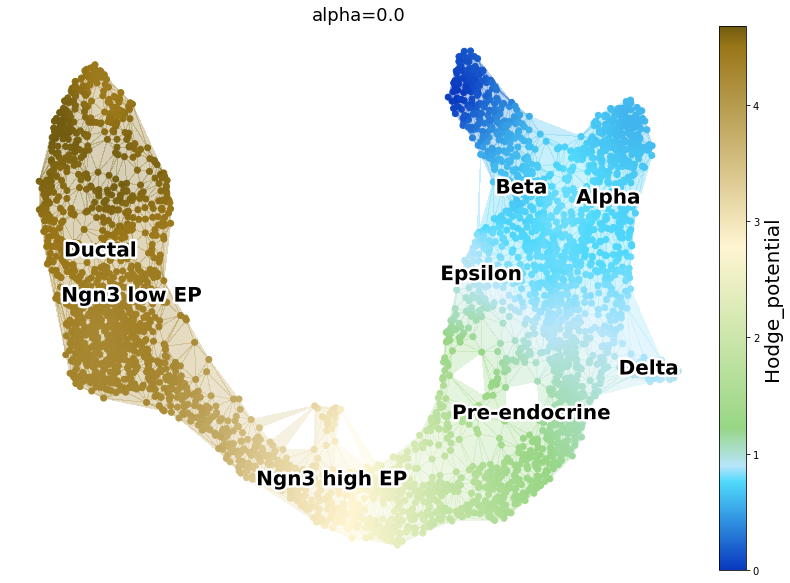

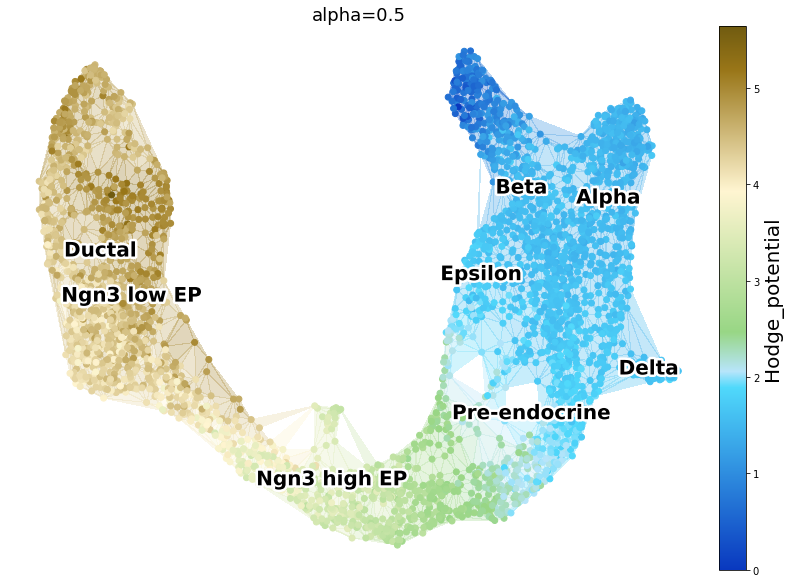

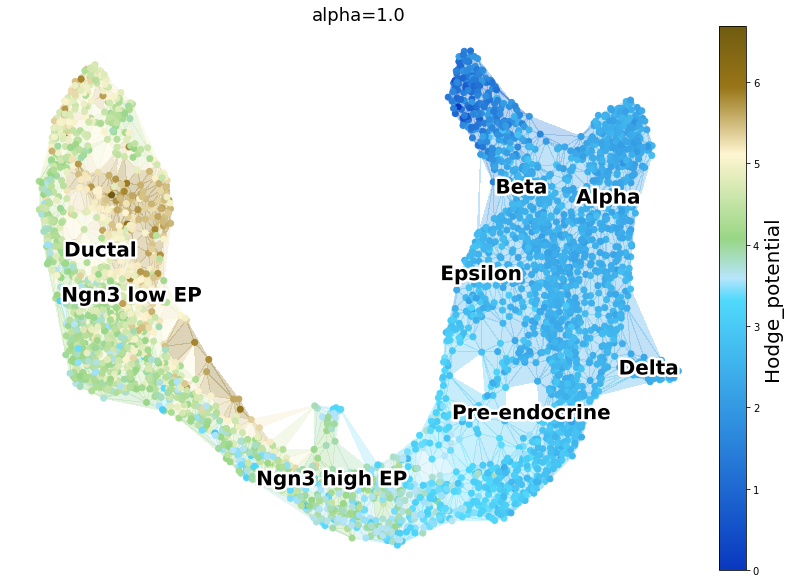

In [12]:
alpha_set = [0,0.5,1]
for alpha in alpha_set:
    cellmap.Hodge_decomposition(adata,alpha=alpha)
    cellmap.view(adata,show_graph = True,cluster_key = 'clusters',title='alpha=%0.1f' % alpha)

In [13]:
cellmap.write(adata, expression_key='RECODE_ss_log')

succeeded in writing CellMapp data as "CellMap.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


X         Y  Potential     Annotation   HVG_Npy  \
CellID                                                                      
AAACCTGAGAGGGATA   6.143066 -0.063644   2.614482  Pre-endocrine  1.595216   
AAACCTGAGCCTTGAT  -9.906417  0.197778   4.041258         Ductal  0.000000   
AAACCTGAGGCAATTA   7.559791  0.583762   2.664236          Alpha  0.000000   
AAACCTGCATCATCCC -11.283765  4.218998   4.515301         Ductal  0.000000   
AAACCTGGTAAGTGGC   1.721565 -4.753407   3.165001   Ngn3 high EP  0.000000   
...                     ...       ...        ...            ...       ...   
TTTGTCAAGTGACATA   4.768472 -1.388353   2.422296  Pre-endocrine  0.000000   
TTTGTCAAGTGTGGCA  -1.873335 -4.182650   4.142288   Ngn3 high EP  3.360464   
TTTGTCAGTTGTTTGG  -9.882250 -0.105594   4.410998         Ductal  2.370325   
TTTGTCATCGAATGCT   6.612424  4.531895   2.313108          Alpha  1.608965   
TTTGTCATCTGTTTGT   3.071043  1.120432   2.529412        Epsilon  0.000000   

                  HVG_Gast  HVG_8430408G22Rik   HVG_Ppy  HVG_Peg10  \
CellID                                                               
AAACCTGAGAGGGATA  0.000000           0.000000  0.000000   0.000000   
AAACCTGAGCCTTGAT  2.864699           4.332361  4.440112   3.151239   
AAACCTGAGGCAATTA  6.449715           2.532200  0.000000   0.000000   
AAACCTGCATCATCCC  0.000000           4.341672  0.000000   0.782671   
AAACCTGGTAAGTGGC  2.630489           2.179326  0.000000   0.000000   
...                    ...                ...       ...        ...   
TTTGTCAAGTGACATA  1.165153           2.066352  0.000000   1.765653   
TTTGTCAAGTGTGGCA  0.000000           0.000000  0.000000   2.512837   
TTTGTCAGTTGTTTGG  1.671262           5.487008  2.970837   1.927453   
TTTGTCATCGAATGCT  6.204628           2.314254  0.000000   5.942950   
TTTGTCATCTGTTTGT  3.619977           1.011941  6.327098   4.986330   

                  HVG_Ppp1r14a  HVG_Mfap4  HVG_Resp18   HVG_Arx  HVG_Lrpprc  
CellID                                                                       
AAACCTGAGAGGGATA      2.470573   0.000000    5.206517  0.794798    5.472670  
AAACCTGAGCCTTGAT      0.000000   0.000000    1.472003  1.839599    1.752149  
AAACCTGAGGCAATTA      0.000000   2.250704    5.361123  5.466969    8.417515  
AAACCTGCATCATCCC      1.180405   0.000000    0.628190  2.379363    3.835260  
AAACCTGGTAAGTGGC      4.958003   5.636513    2.197958  2.683184    4.934095  
...                        ...        ...         ...       ...         ...  
TTTGTCAAGTGACATA      3.175298   3.488763    1.292896  3.167998    5.016490  
TTTGTCAAGTGTGGCA      6.077316   4.999903    0.000000  2.824503    2.799108  
TTTGTCAGTTGTTTGG      1.684987   0.000000    1.521346  0.000000    4.846968  
TTTGTCATCGAATGCT      0.841934   3.542235    4.537755  4.311284    3.127061  
TTTGTCATCTGTTTGT      0.000000   3.356201    0.000000  5.990267   10.531797  

[3696 rows x 14 columns]

In [14]:
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'Hodge_potential', 'Hodge_rotation'
    var: 'highly_variable_genes', 'silent gene', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'scale_factor', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'CellMap_log', 'CM_graph', 'hvg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'RECODE', 'RECODE_ss_log', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [15]:
cluster = adata.obs['clusters']
cluster_set = np.unique(cluster)
id_color = np.empty(len(cluster),dtype=int)
for i in range(len(cluster_set)):
    id_color[cluster == cluster_set[i]] = i

In [16]:
adata.obs["n_counts"],adata.obs["Hodge_potential"]

(CellID
 AAACCTGAGAGGGATA    6194.000488
 AAACCTGAGCCTTGAT    6193.999512
 AAACCTGAGGCAATTA    6193.999512
 AAACCTGCATCATCCC    6193.999512
 AAACCTGGTAAGTGGC    6194.000000
                        ...     
 TTTGTCAAGTGACATA    6193.999023
 TTTGTCAAGTGTGGCA    6194.000000
 TTTGTCAGTTGTTTGG    6193.999512
 TTTGTCATCGAATGCT    6194.000000
 TTTGTCATCTGTTTGT    6194.000977
 Name: n_counts, Length: 3696, dtype: float32,
 CellID
 AAACCTGAGAGGGATA    2.614482
 AAACCTGAGCCTTGAT    4.041258
 AAACCTGAGGCAATTA    2.664236
 AAACCTGCATCATCCC    4.515301
 AAACCTGGTAAGTGGC    3.165001
                       ...   
 TTTGTCAAGTGACATA    2.422296
 TTTGTCAAGTGTGGCA    4.142288
 TTTGTCAGTTGTTTGG    4.410998
 TTTGTCATCGAATGCT    2.313108
 TTTGTCATCTGTTTGT    2.529412
 Name: Hodge_potential, Length: 3696, dtype: float64)

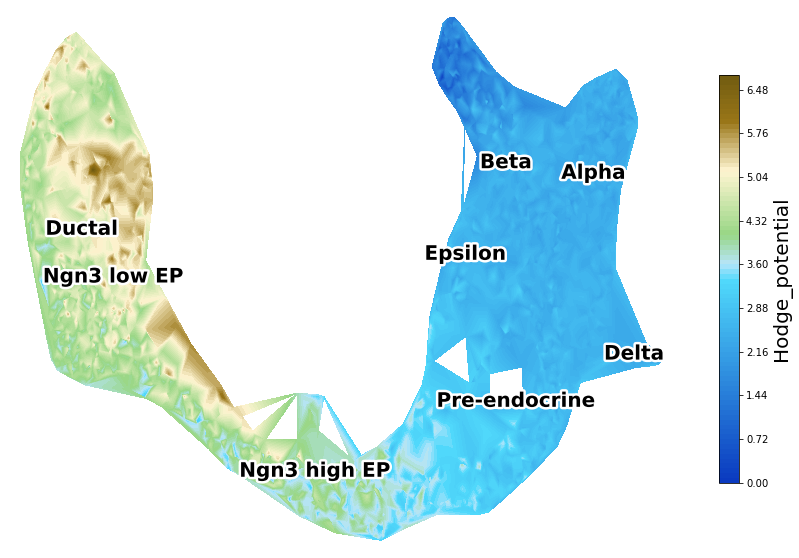

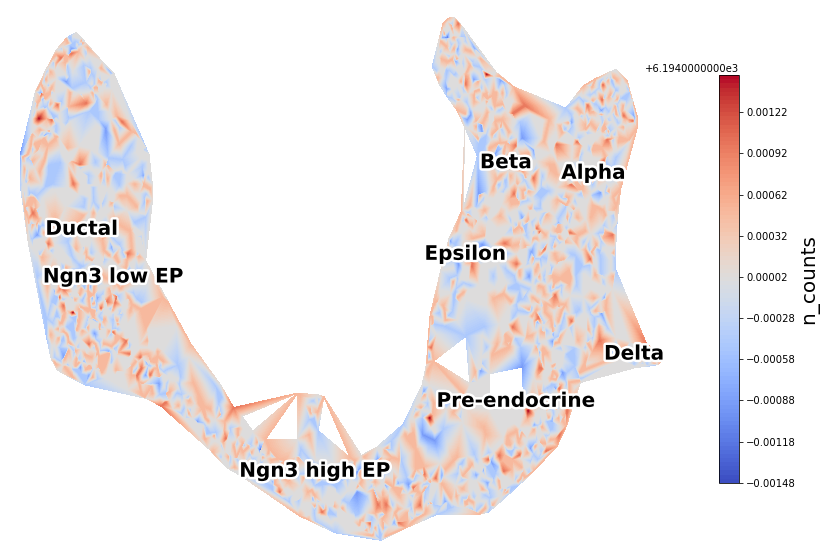

In [17]:

importlib.reload(cellmap)
cellmap.view_surface(adata,cluster_key ='clusters')
cellmap.view_surface(adata,potential_key='n_counts',cluster_key ='clusters',cmap='coolwarm')

In [61]:
importlib.reload(cellmap)
from cellmap import *

def Hodge_decomposition_genes(
    adata,
    exp_key = None,
    vel_key  = 'velocity',
    exp_2d_key = 'X_umap',
    vel_2d_key = 'velocity_umap',
    potential_key = 'Hodge_potential',
    rotation_key = 'Hodge_rotation',
    graph_key = 'CM_graph',
    graph_method = 'Delauney',
    alpha = 0.2,
    n_neighbors = 10,
    contribution_rate = 0.95,
    cutedge_vol  = None,
    cutedge_length = None,
    verbose = True,
    use_HVG = True,
    n_HVG = 10,
    ):
    """
    Hodge decomposition

    Parameters
    ----------
    adata: anndata (n_samples, n_features)
    
    exp_key: None or string
    """
    
    kwargs_arg = check_arguments(adata, exp_key=exp_key, vel_key = vel_key, exp_2d_key=exp_2d_key, vel_2d_key=vel_2d_key, graph_method=graph_method)
    exp_key,vel_key,exp_2d_key,vel_2d_key = kwargs_arg['exp_key'],kwargs_arg['vel_key'],kwargs_arg['exp_2d_key'],kwargs_arg['vel_2d_key']
    
    
    if exp_key == None:
        if scipy.sparse.issparse(adata.X):
            exp_HD = adata.X.toarray()
        else:
            exp_HD = adata.X
    elif exp_key in adata.obsm.keys():
        exp_HD = adata.obsm[exp_key]
    else:
        exp_HD = adata.layers[exp_key]
    
    vel_HD = adata.obsm[vel_key] if vel_key in adata.obsm.keys() else adata.layers[vel_key]
    exp_LD = adata.obsm[exp_2d_key][:,:2] if exp_2d_key in adata.obsm.keys() else adata.layers[exp_2d_key][:,:2]
    vel_LD = adata.obsm[vel_2d_key][:,:2] if vel_2d_key in adata.obsm.keys() else adata.layers[vel_2d_key][:,:2]
    
    n_node_ = exp_HD.shape[0]
    if graph_method == 'Delauney':
        tri_,idx_tri = create_graph(exp_LD[:,0],exp_LD[:,1],cutedge_vol=cutedge_vol,cutedge_length=cutedge_length,return_mask = True)
        source, target = np.ravel(tri_.triangles[idx_tri][:,[0,1,2]]),np.ravel(tri_.triangles[idx_tri][:,[1,2,0]])
    elif graph_method == 'knn':
        pca = sklearn.decomposition.PCA()
        exp_HD_pca = pca.fit_transform(exp_HD)
        n_pca = np.min(np.arange(len(pca.explained_variance_ratio_))[np.cumsum(pca.explained_variance_ratio_)>contribution_rate])
        knn = NearestNeighbors(n_neighbors=n_neighbors+1, algorithm='kd_tree')
        knn.fit(exp_HD_pca[:,:n_pca])
        distances, indices = knn.kneighbors(exp_HD_pca[:,:n_pca])
        distances, indices = distances[:,1:], indices[:,1:]
        source = np.ravel(np.repeat(np.arange(exp_HD.shape[0]).reshape((-1, 1)),n_neighbors,axis=1))
        target = np.ravel(indices)
    
    n_edge_ = len(source)
    grad_mat = np.zeros([n_edge_,n_node_],dtype=float)
    grad_mat[tuple(np.vstack((np.arange(n_edge_),source)))] = -1
    grad_mat[tuple(np.vstack((np.arange(n_edge_),target)))] = 1
    div_mat = -grad_mat.T
    lap = -np.dot(div_mat,grad_mat)
    lap_inv = np.linalg.pinv(lap)
    
    scanpy.pp.highly_variable_genes(adata)
    min_mean = np.percentile(np.mean(adata.X.toarray(),axis=0)[np.mean(adata.X.toarray(),axis=0)>0],90)
    idx_means = adata.var['means'] > min_mean
    adata.var['CellMap_HVG'] = np.array(np.zeros(adata.shape[1]),dtype=bool)
    for gene in adata.var.index[idx_means][np.argsort(adata.var['dispersions_norm'].values[idx_means])[::-1][:n_HVG]]:
        print(gene)
        adata.var['CellMap_HVG'][adata.var.index == gene] = True
        X1,X2 = exp_HD[:,adata.var.index == gene][source],exp_HD[:,adata.var.index == gene][target]
        V1,V2 = vel_HD[:,adata.var.index == gene][source],vel_HD[:,adata.var.index == gene][target]
        Dis = np.linalg.norm(X2-X1,axis=1)
        Dis[Dis==0] = 1
        edge_vel = np.sum(0.5*(V1+V2)*(X2-X1),axis=1)/Dis
        source_term = np.dot(div_mat,edge_vel)
        potential = np.dot(lap_inv,source_term)
        adata.obs[potential_key+'_Gene_%s' % gene] = potential - np.min(potential)
    
    # rot_flow = edge_vel - pot_flow
    # source_target = np.hstack((source,target))
    # rot_flow_2 = np.hstack((rot_flow,rot_flow))
    # adata.obs[rotation_key] = np.array([np.mean(rot_flow_2[source_target==i]) for i in range(adata.shape[0])])

#     log_ = {}
#     log_["Contribution_ratio"] = {}
#     norm_grad = np.linalg.norm(pot_flow)
#     norm_curl = np.linalg.norm(rot_flow)
#     log_["Contribution_ratio"]['Potential'] = '{:.2%}'.format(norm_grad/(norm_grad+norm_curl))
#     log_["Contribution_ratio"]['Rotation']  = '{:.2%}'.format(norm_curl/(norm_grad+norm_curl))
#     adata.uns['CellMap_log'] = log_
#     if verbose: print(adata.uns['CellMap_log'])

#     if graph_key not in adata.uns.keys(): adata.uns[graph_key] = np.vstack((source,target))
Hodge_decomposition_genes(adata,exp_key='RECODE_ss_log')

Npy
Gast
8430408G22Rik
Ppy


/tmp/ipykernel_611/2244583792.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.var['CellMap_HVG'][adata.var.index == gene] = True


Peg10
Ppp1r14a
Mfap4
Resp18
Arx
Lrpprc


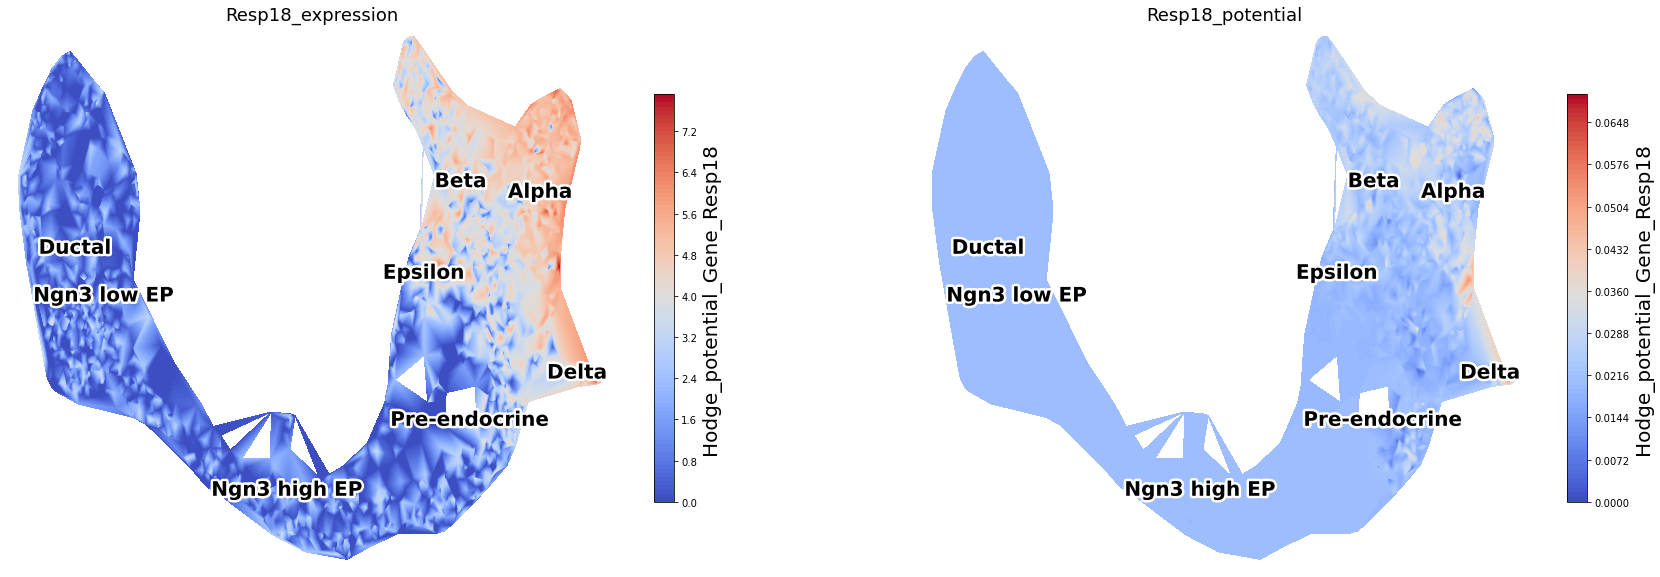

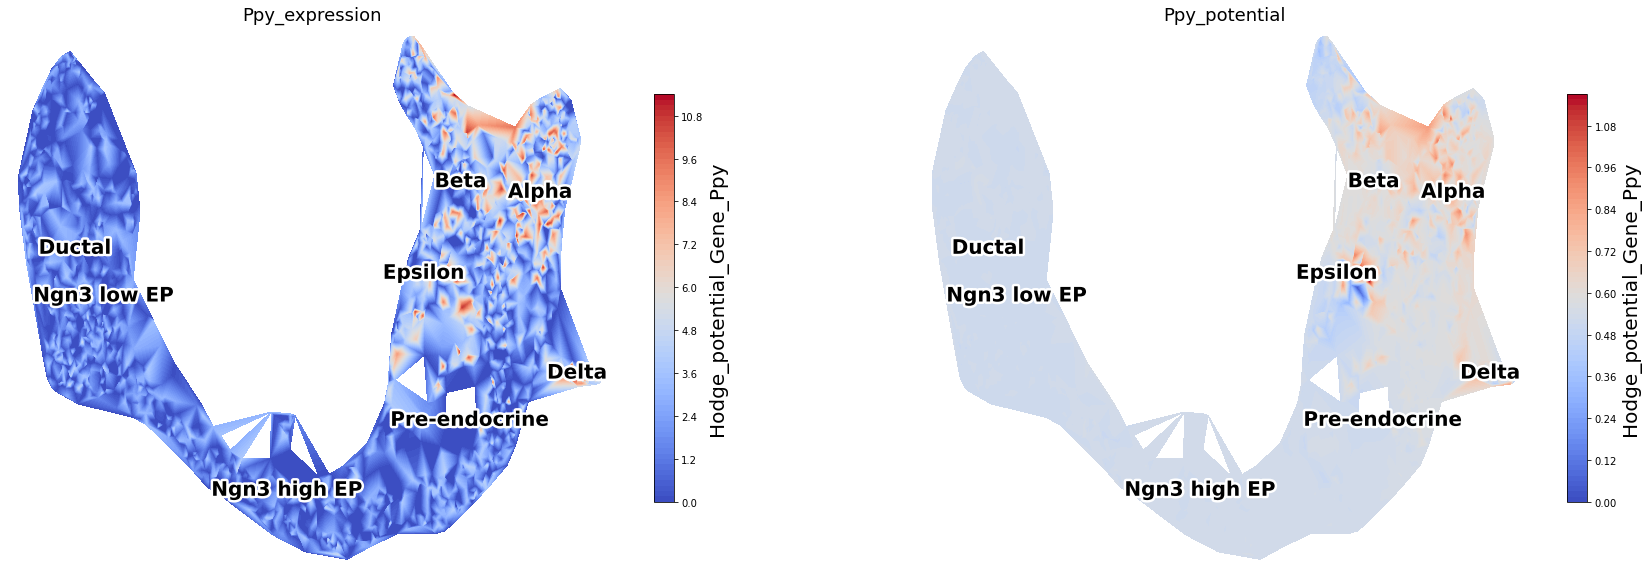

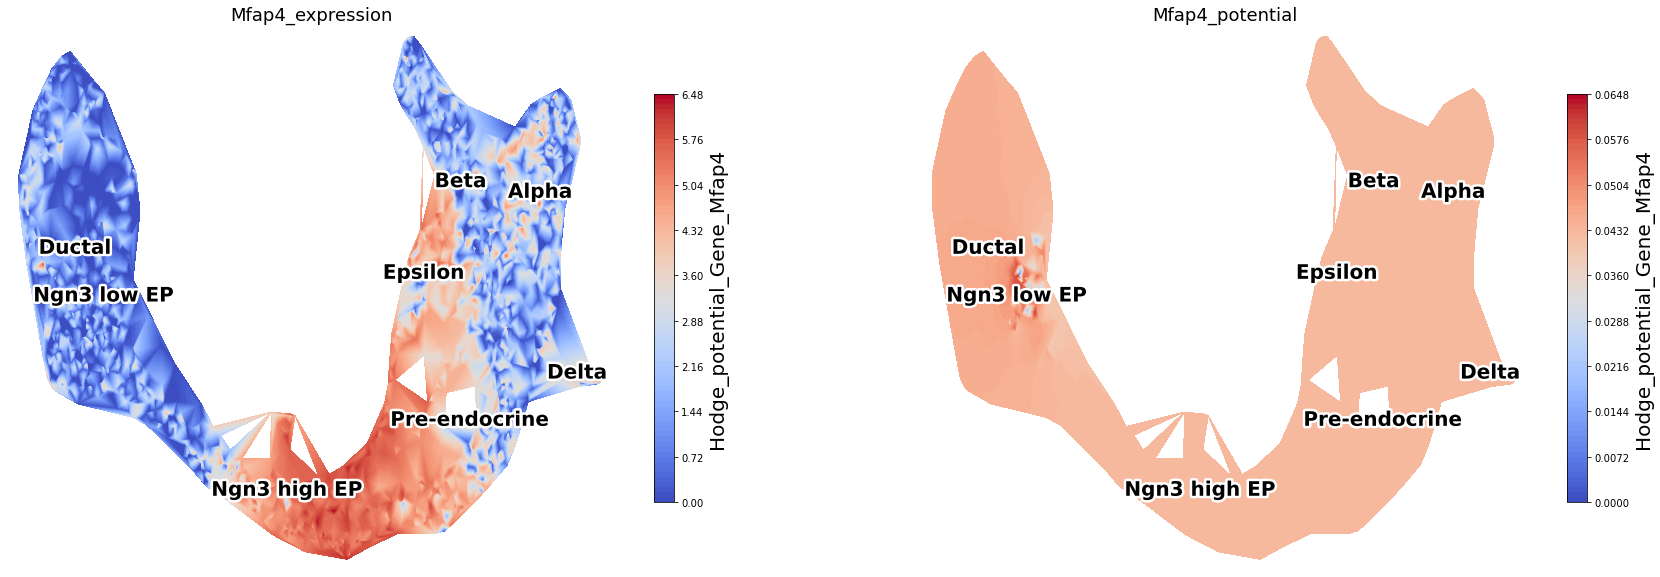

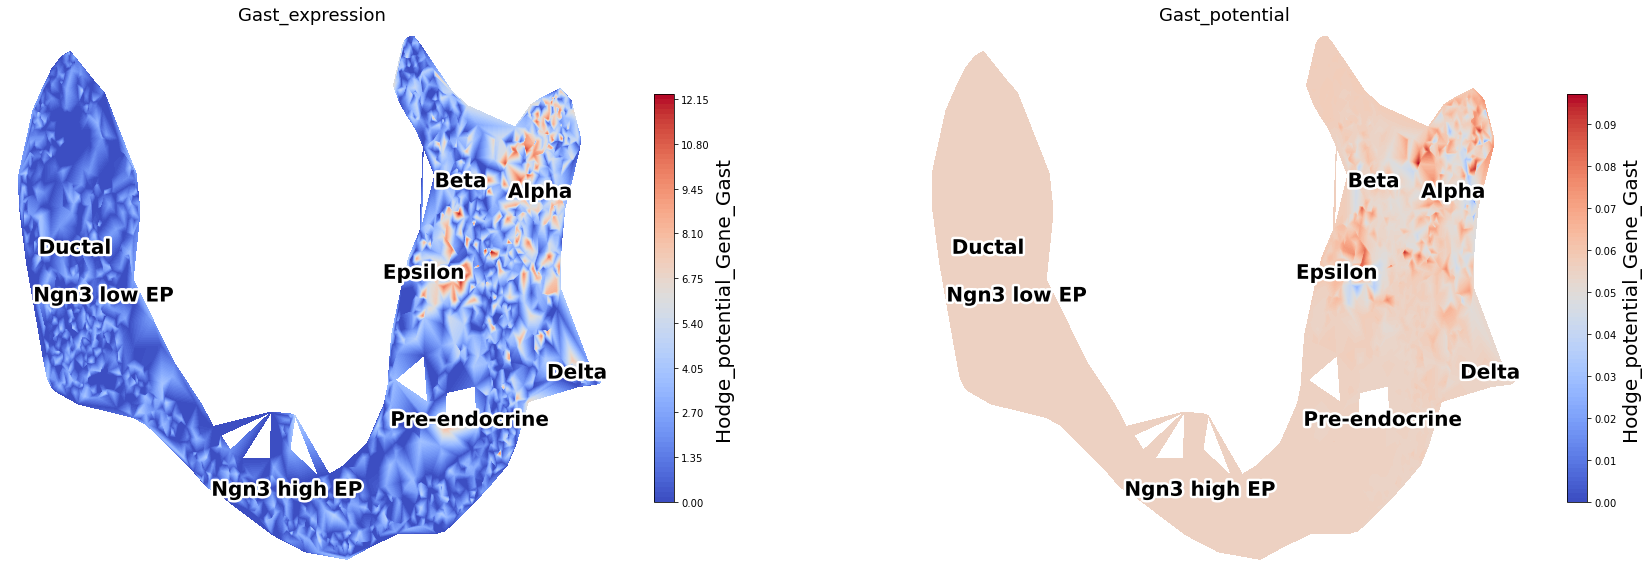

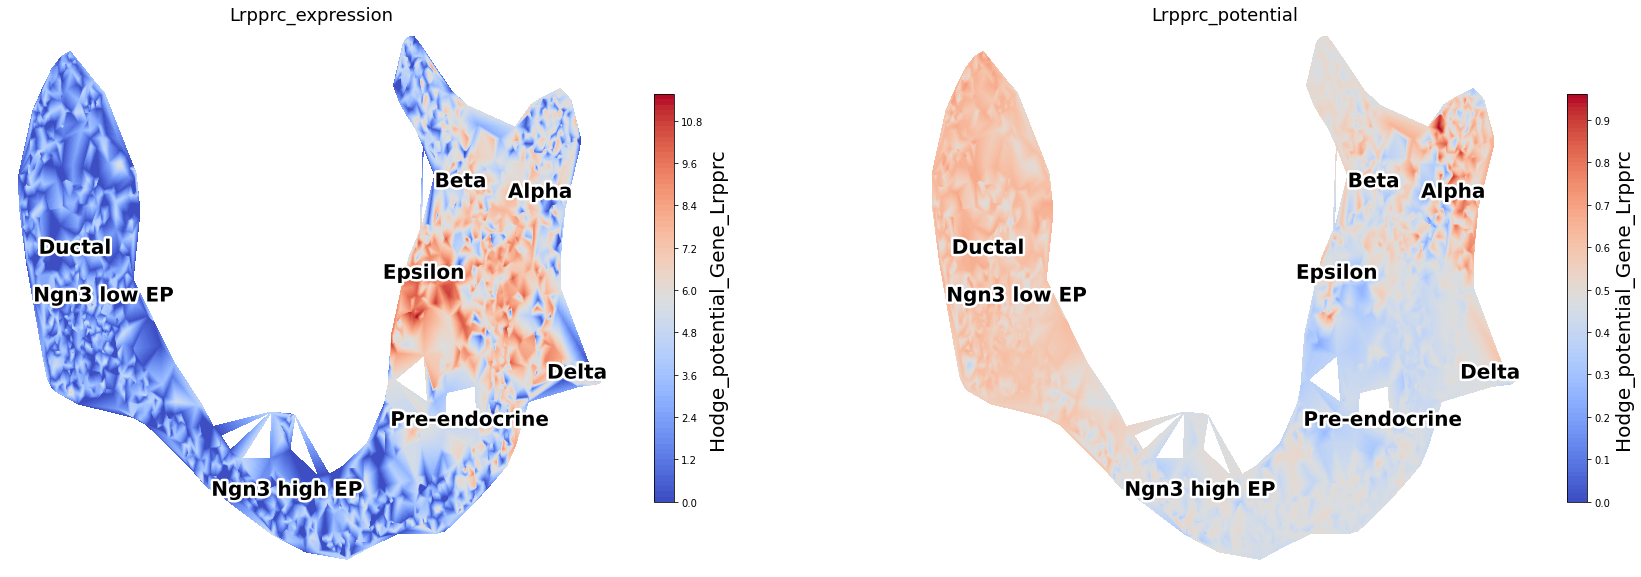

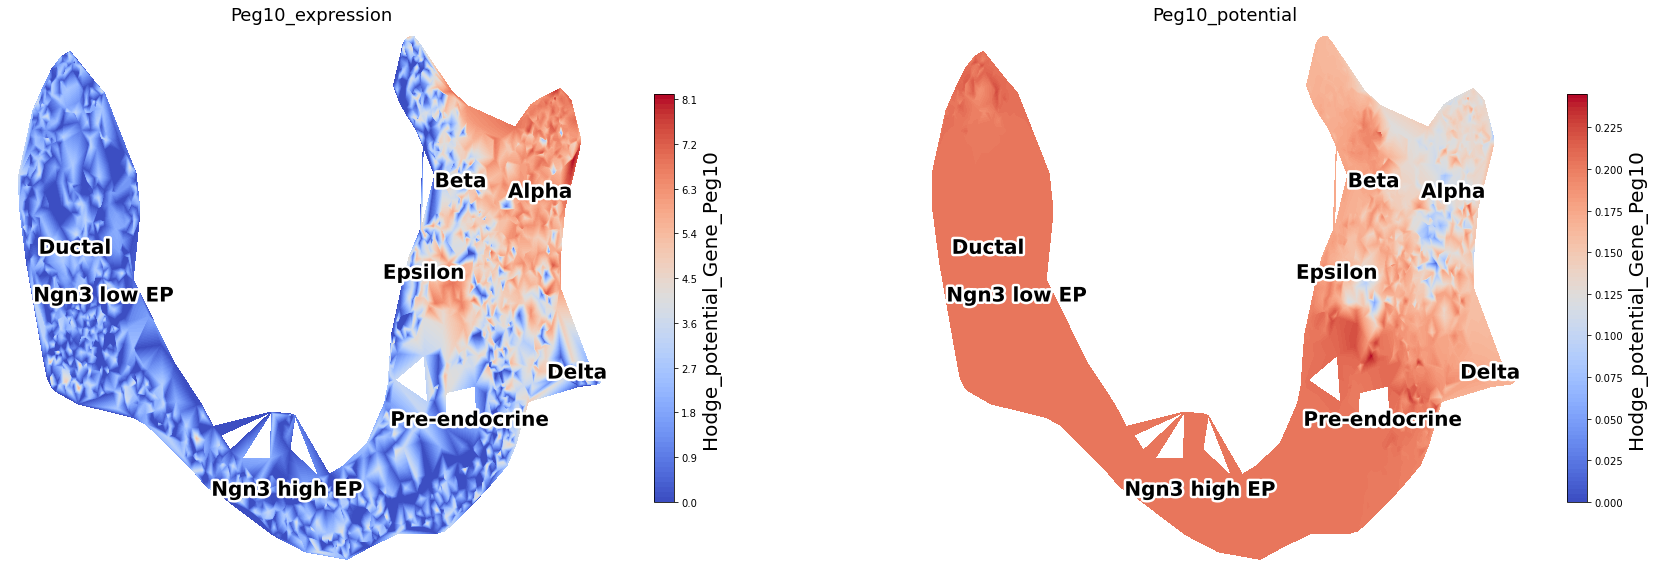

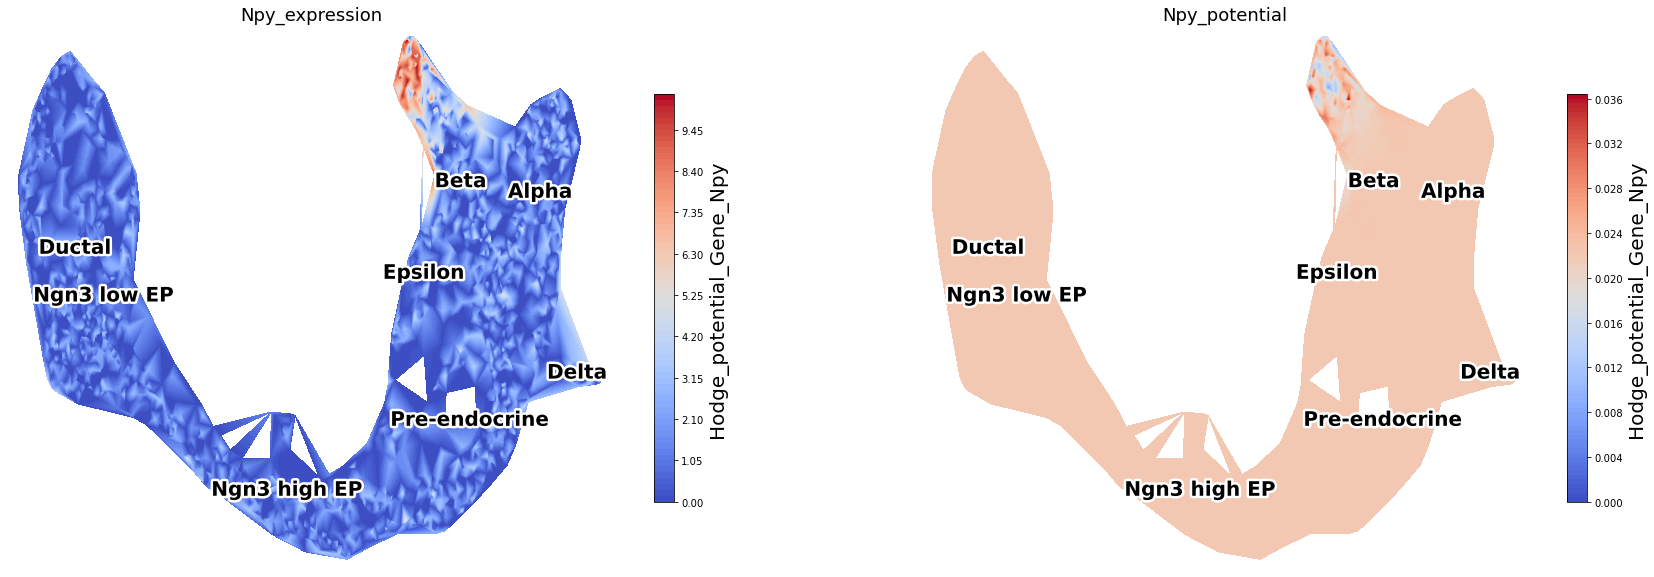

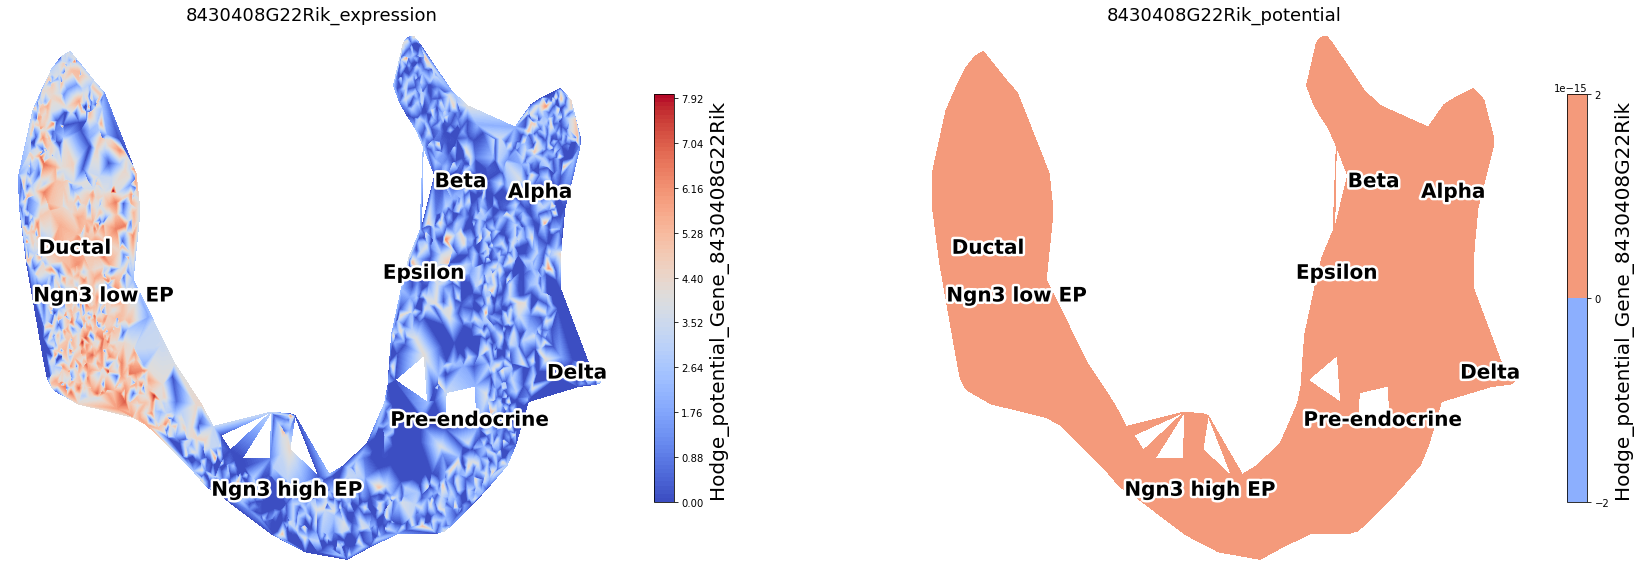

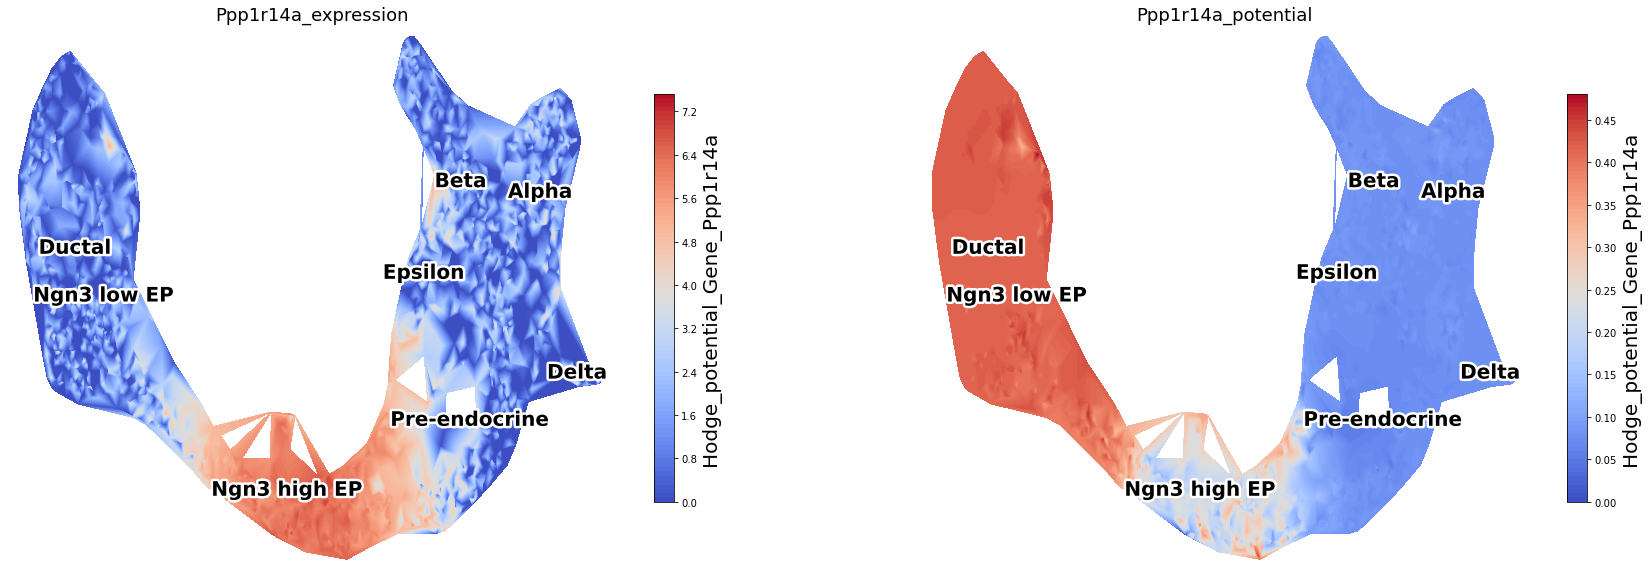

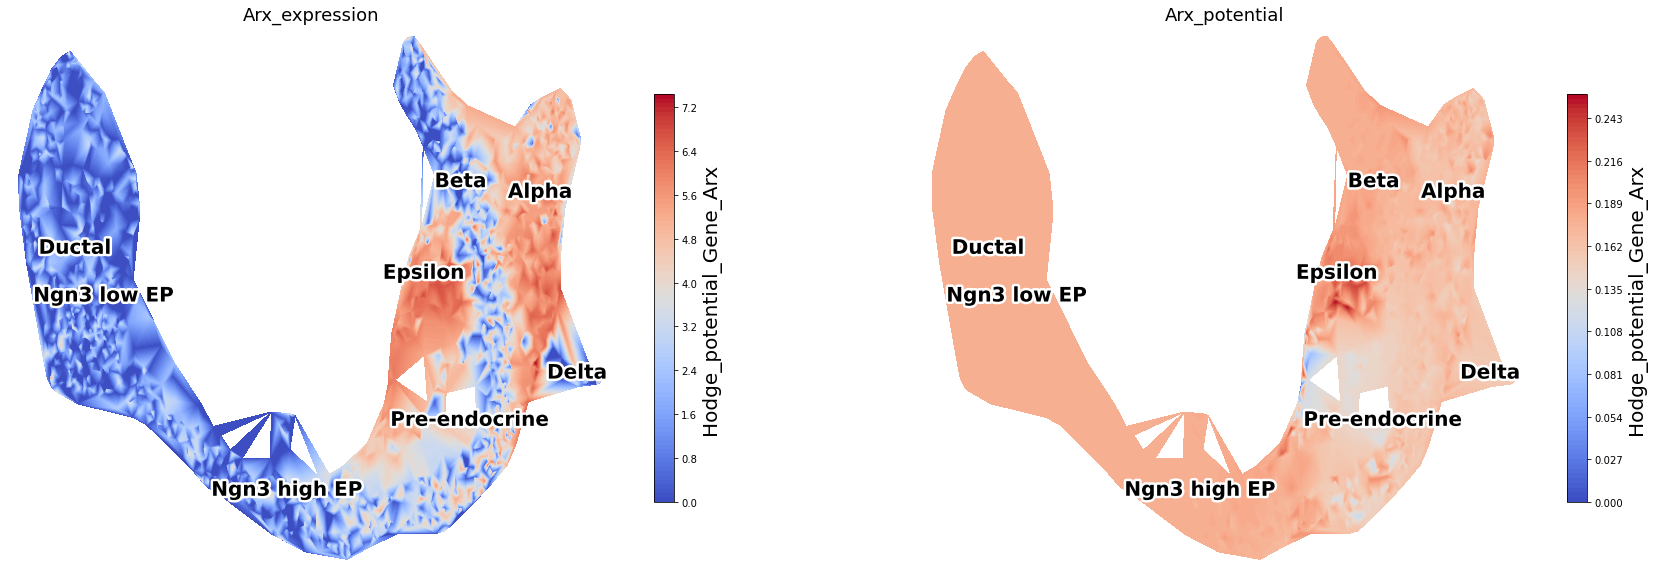

In [62]:
def view_surface_gene(
    adata,
    gene,
    exp_key = None,
    vel_key  = 'velocity',
    basis = 'X_umap',
    potential_key = 'Hodge_potential',
    graph_key = 'CM_graph',
    cluster_key = None,
    show_graph = False,
    cutedge_vol  = None,
    cutedge_length = None,
    **kwargs
    ):
    
    kwargs_arg = check_arguments(adata,
                             basis = basis,
                             potential_key = potential_key,
                             graph_key = graph_key,
                            )
    basis = kwargs_arg['basis']
    
    if exp_key == None:
        if scipy.sparse.issparse(adata.X):
            exp_HD = adata.X.toarray()
        else:
            exp_HD = adata.X
    elif exp_key in adata.obsm.keys():
        exp_HD = adata.obsm[exp_key]
    else:
        exp_HD = adata.layers[exp_key]
    
    vel_HD = adata.obsm[vel_key] if vel_key in adata.obsm.keys() else adata.layers[vel_key]

    if 'cmap' not in kwargs:
        kwargs['cmap'] = cmap_earth(adata.obs[potential_key])
    
    data_pos = adata.obsm[basis]
    tri_ = create_graph(data_pos[:,0],data_pos[:,1],cutedge_vol=cutedge_vol,cutedge_length=cutedge_length)
    fig,ax = plt.subplots(1,2,figsize=(30,10))
    cntr = ax[0].tricontourf(tri_,np.squeeze(exp_HD[:,adata.var.index==gene]),cmap=kwargs['cmap'],levels=100,zorder=2)
    fig.colorbar(cntr, shrink=0.75, orientation='vertical',ax=ax[0]).set_label(potential_key,fontsize=20)
    ax[0].set_title('%s_expression' % gene,fontsize=18)
    cntr = ax[1].tricontourf(tri_,np.squeeze(exp_HD[:,adata.var.index==gene]),cmap=kwargs['cmap'],levels=100,zorder=2)
    fig.colorbar(cntr, shrink=0.75, orientation='vertical',ax=ax[1]).set_label(potential_key,fontsize=20)
    ax[1].set_title('%s_potential' % gene,fontsize=18)
    cntr = ax[2].tricontourf(tri_,adata.obs[potential_key],cmap=kwargs['cmap'],levels=100,zorder=2)
    fig.colorbar(cntr, shrink=0.75, orientation='vertical',ax=ax[2]).set_label(potential_key,fontsize=20)
    ax[2].set_title('%s_potential' % gene,fontsize=18)
    for ax_i in range(2):
        if show_graph: ax[ax_i].triplot(tri_,color='w',lw=0.5,zorder=10,alpha=1)
        ax[ax_i].set_xlim(np.min(data_pos[:,0])-0.02*(np.max(data_pos[:,0])-np.min(data_pos[:,0])),np.max(data_pos[:,0])+0.02*(np.max(data_pos[:,0])-np.min(data_pos[:,0])))
        ax[ax_i].set_ylim(np.min(data_pos[:,1])-0.02*(np.max(data_pos[:,1])-np.min(data_pos[:,1])),np.max(data_pos[:,1])+0.02*(np.max(data_pos[:,1])-np.min(data_pos[:,1])))
        ax[ax_i].tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False,bottom=False,left=False,right=False,top=False)
        ax[ax_i].spines['right'].set_visible(False),ax[ax_i].spines['top'].set_visible(False),ax[ax_i].spines['bottom'].set_visible(False),ax[ax_i].spines['left'].set_visible(False)
        if cluster_key != None:
            texts = []
            if cluster_key in adata.obs.keys():
                cluster = adata.obs[cluster_key]
                for c in np.unique(cluster):
                    txt = ax[ax_i].text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=20,ha='center', va='center',fontweight='bold')
                    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
                    texts.append(txt)

for gene in adata.var.index[adata.var['CellMap_HVG']]:
    view_surface_gene(adata,gene,exp_key='RECODE_ss_log',potential_key='Hodge_potential_Gene_%s' % gene,cluster_key = 'clusters',cmap='coolwarm')
# gene = adata.var.index[adata.var['CellMap_HVG']][0]
# view_surface_gene(adata,gene,potential_key='Hodge_potential_Gene_%s' % gene,cluster_key = 'clusters',cmap='coolwarm')